In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from universe import *
# import seaborn as sns
from utils import *
from fisher import *
from profiles import*
from halo import HaloModel
from kernels import LensCMB
from limber import Limber

%load_ext line_profiler


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
cosmo = Cosmo()

In [3]:
clkk = cosmo.cmb_spectra(2000)[:,4]

universe.py:466: RuntimeWarning: divide by zero encountered in divide
  fact = 2.*np.pi/(ls*(ls+1)) * 1.e12 * self.pars.TCMB**2.
universe.py:474: RuntimeWarning: invalid value encountered in multiply
  cls[:,i] *= fact


In [4]:
mf = MassFunction(cosmo)

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


In [34]:
lens = ClusterLensing(cosmo, hmf=mf)

In [35]:
dens = ClusterDensity(cosmo, hmf=mf)

## Lensing profile Fourier transform $\phi_{\ell}(M,z)$ and $\kappa_{\ell}(M,z)$ as function of upper integration limit

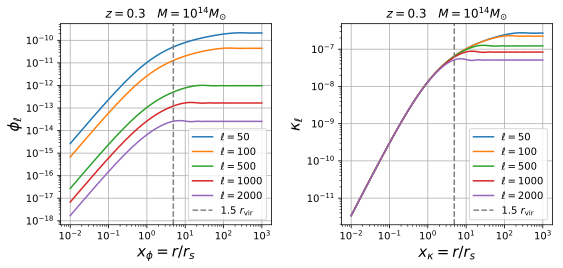

In [48]:
plt.figure(figsize=(8,4),)

plt.subplot(121)
plt.title(r'$z=0.3 \quad M=10^{14}M_{\odot}$')
for l in [50,100,500,1000,2000]:
    phiells = np.zeros(npts)
    for i, xmax in enumerate(xmaxs):
        phiells[i]=lens.phi_ell(l, 1e14, 0.3, xmax=xmax, npts=1000)
    plt.plot(xmaxs, phiells, label=r'$\ell=%d$'%l)#/phiells.max())
# plt.plot(xmaxs, yells/yells.max())
plt.xscale('log')
plt.yscale('log')
plt.axvline(c_Duffy(1e14, 0.3, cosmo.h, kind='vir'), ls='--', color='grey', label=r'1.5 $r_{\rm vir}$')
plt.xlabel(r'$x_{\phi}=r/r_s$',size=15)
plt.ylabel(r'$\phi_{\ell}$',size=15)
plt.legend()
plt.grid()

plt.subplot(122)
plt.title(r'$z=0.3 \quad M=10^{14}M_{\odot}$')
for l in [50,100,500,1000,2000]:
    kappaells = np.zeros(npts)
    for i, xmax in enumerate(xmaxs):
        kappaells[i]=lens.kappa_ell(l, 1e14, 0.3, xmax=xmax, npts=1000)
    plt.plot(xmaxs, kappaells, label=r'$\ell=%d$'%l)#/phiells.max())
# plt.plot(xmaxs, yells/yells.max())
plt.xscale('log')
plt.yscale('log')
plt.axvline(c_Duffy(1e14, 0.3, cosmo.h, kind='vir'), ls='--', color='grey', label=r'1.5 $r_{\rm vir}$')
plt.xlabel(r'$x_{\kappa}=r/r_s$',size=15)
plt.ylabel(r'$\kappa_{\ell}$',size=15)
plt.legend()
plt.grid()

plt.tight_layout()

## Lensing profile Fourier transform $\kappa_{\ell}(M,z)$ as function of $M$ and $z$

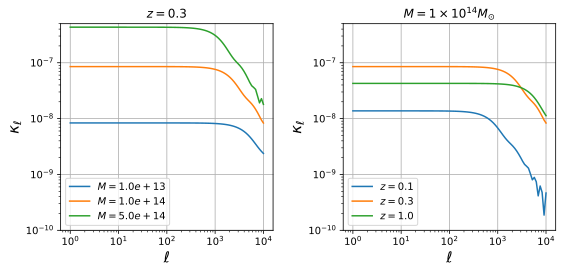

In [52]:
ls = np.logspace(0,4,100)
kappals = [lens.kappa_ell(l, 1e14, 0.3) for l in ls]

plt.figure(figsize=(8,4),)
plt.subplot(121)
for M in [1e13, 1e14, 5e14]:
    plt.loglog(ls, [lens.kappa_ell(l, M, 0.3) for l in ls], label=r'$M=%.1e$'%M)
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$\kappa_{\ell}$', size=15)
plt.title(r'$z=0.3$')
plt.grid()
plt.ylim(1e-10,5e-7)

plt.subplot(122)
for z in [0.1,0.3,1.]:
    plt.loglog(ls, [lens.kappa_ell(l, 1e14, z) for l in ls], label=r'$z=%.1f$'%z)
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$\kappa_{\ell}$', size=15)
plt.title(r'$M=1\times 10^{14}M_{\odot}$')
plt.grid()
plt.ylim(1e-10,5e-7)
plt.tight_layout()

## Calculate lensing potential power spectrum

In [7]:
ell_array = np.round(np.logspace(np.log10(10),np.log10(2e3),25))

In [53]:
hm = HaloModel(cosmo, mf, lrange=ell_array, npts=80, zmin=0.005, zmax=10, Mmin=1e5/cosmo.h, Mmax=5e15/cosmo.h)


In [38]:
cl1h_kk = {}
cl2h_kk = {}

npts_arr = [20,30,40,50,100]

for i in npts_arr:
    print i,'---------'
    hm = HaloModel(cosmo, mf, lrange=ell_array, npts=i)
    cl1h_kk[i] = hm.GetCl1Halo(lens.kappa_ell)
    cl2h_kk[i] = hm.GetCl2Halo(lens.kappa_ell)    

20 ---------
10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0
30 ---------
10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0
40 ---------
10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0
50 ---------
10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0
100 ---------
10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0


In [62]:
cl1h_kk_80 = hm.GetCl1Halo(lens.kappa_ell)
cl2h_kk_80 = hm.GetCl2Halo(lens.kappa_ell)    

10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0


Text(0,0.5,u'$C_{\\ell}^{\\kappa\\kappa}$')

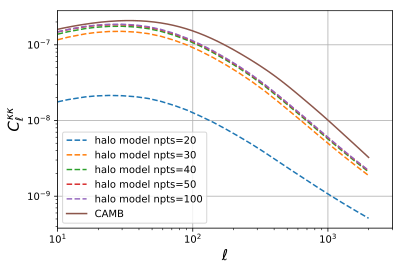

In [39]:
# plt.plot(limb.lrange, limb.GetCl(lenscmb), ':', label='Limber')
for i in npts_arr:
    plt.plot(ell_array, (cl2h_kk[i]+cl1h_kk[i]), '--', label=r'halo model npts=%d'%i)
plt.plot(clkk, '-', label=r'CAMB')
plt.xlim([10,3000])
plt.xscale('log')
plt.yscale('log')
# plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$C_{\ell}^{\kappa\kappa}$',size=15)


Text(0,0.5,u'$C_{\\ell}^{\\kappa\\kappa}$')

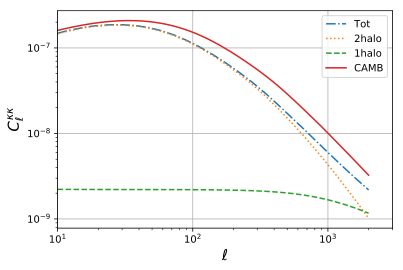

In [41]:
plt.plot(ell_array, (cl2h_kk[100]+cl1h_kk[100]), '-.', label=r'Tot')
plt.plot(ell_array, (cl2h_kk[100]), ':', label=r'2halo')
plt.plot(ell_array, (cl1h_kk[100]), '--', label=r'1halo')
plt.plot(clkk, '-', label=r'CAMB')
plt.xlim([10,3000])
plt.xscale('log')
plt.yscale('log')
# plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$C_{\ell}^{\kappa\kappa}$',size=15)


In [181]:
%lprun -f hm.GetCl1Halo hm.GetCl1Halo(lens.kappa_ell)    

10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0


In [32]:
%lprun -f hm.GetCl1HaloMassInt hm.GetCl1HaloMassInt(100, lens.kappa_ell)    

In [179]:
%lprun -f lens.kappa_ell lens.kappa_ell(100,1e14,1)

In [36]:
%lprun -f lens.SigmaCritical lens.SigmaCritical(0.2)

In [37]:
%timeit cosmo.d_A(np.arange(1,100))

The slowest run took 5.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.1 µs per loop


In [163]:
zs = np.linspace(0,100)

In [160]:
cosmo.spline_H_z(0)

array(67.70266850597676)

In [111]:
cosmo.bkd.hubble_parameter(0)

67.70266850597676

In [12]:
clkk_3 = hm.GetCl1Halo(lens.kappa_ell)+hm.GetCl2Halo(lens.kappa_ell)

10.0
12.0
16.0
19.0
24.0
30.0
38.0
47.0
58.0
73.0
91.0
113.0
141.0
176.0
220.0
274.0
342.0
426.0
532.0
663.0
827.0
1031.0
1286.0
1604.0
2000.0


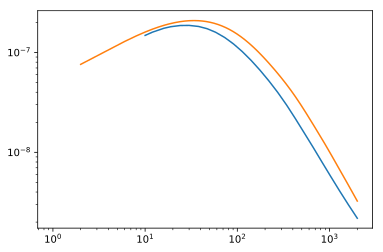

In [16]:
# plt.loglog(ell_array, clkk_)
# plt.loglog(ell_array, clkk_2)
plt.loglog(ell_array, clkk_3)
plt.loglog(clkk)

In [18]:
npts=100
xmaxs = np.logspace(-2,3,npts)


In [268]:
(1.16 - 0.73)/0.18

2.388888888888889

In [235]:
from cosmojo.bubbles import Bubbles

In [236]:
bubble = Bubbles(cosmo, lrange=[10,100,300,500,1000,2000])

In [237]:
bubble.F_k(0.1)

8057.5400365088162

In [186]:
k = np.logspace(-3,1)

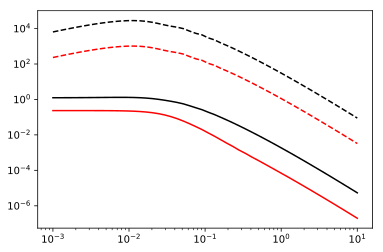

In [187]:
plt.loglog(k, [bubble.P_k_bubble_2h(k_,1) for k_ in k], 'k--')
plt.loglog(k, [bubble.P_k_bubble_1h(k_,1) for k_ in k], 'k-')
plt.loglog(k, [bubble.P_k_bubble_2h(k_,10) for k_ in k], 'r--')
plt.loglog(k, [bubble.P_k_bubble_1h(k_,10) for k_ in k], 'r-')

# plt.semilogx(k, bubble.spline_I_k(k), '--')

In [60]:
%timeit bubble.P_k_bubble_1h(3,0.3)

10 loops, best of 3: 116 ms per loop


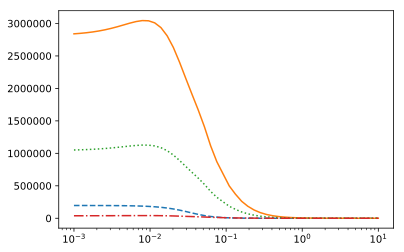

In [188]:
plt.semilogx(k, bubble.spline_F_k(k), '--')
plt.semilogx(k, [bubble.G_k(k_,0) for k_ in k], '-')
plt.semilogx(k, [bubble.G_k(k_,1) for k_ in k], ':')
plt.semilogx(k, [bubble.G_k(k_,10) for k_ in k], '-.')

In [118]:
bubble.G_k(0.3, 1)


28175.559798891896

In [190]:
bubble.G_k(0.3, 1)

28049.732959787601

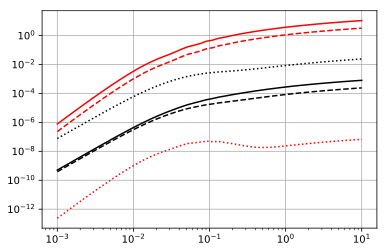

In [241]:
plt.loglog(k, k**3*[bubble.P_k_bubble_1h(k_,5) for k_ in k], 'k-')
plt.loglog(k, k**3*[bubble.P_k_bubble_2h(k_,5) for k_ in k], 'r-')
plt.loglog(k, k**3*[bubble.P_k_bubble_1h(k_,10) for k_ in k], 'k--')
plt.loglog(k, k**3*[bubble.P_k_bubble_2h(k_,10) for k_ in k], 'r--')
plt.loglog(k, k**3*[bubble.P_k_bubble_1h(k_,15) for k_ in k], 'k:')
plt.loglog(k, k**3*[bubble.P_k_bubble_2h(k_,15) for k_ in k], 'r:')
plt.grid()

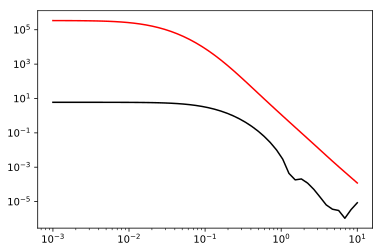

In [239]:
plt.loglog(k, np.abs(bubble.spline_I_k(k)), 'k-')
plt.loglog(k, bubble.spline_F_k(k), 'r-')


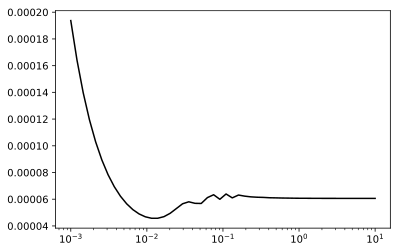

In [195]:
plt.semilogx(k, [bubble.P_k_bubble_1h(k_,1)/bubble.P_k_bubble_2h(k_,1) for k_ in k], 'k-')


(0.001, 30)

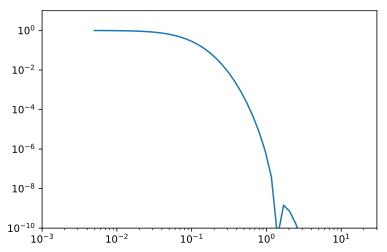

In [238]:
plt.loglog(k[:-2]*bubble.R_bar, (bubble.spline_I_k(k[:-2]*bubble.R_bar)/bubble.b)**2 )
plt.ylim(1e-10,10)
plt.xlim(1e-3,30)

In [213]:
np.log(2)

0.69314718055994529

In [ ]:
np.arange(8000)

In [64]:
npts

100